In [331]:
#path to kidney hubmap csv
PATH = "csv/Kidney_HuBMAP_Portal"

In [332]:
import os
import pandas as pd

dict = {}

for file in os.listdir(PATH):
    data = pd.read_csv(os.path.join(PATH, file))[['cell_type', 'count']]
    data.index = data['cell_type']
    data = data["count"]

    dict[file[:-4]] = pd.Series(data).to_dict()


In [308]:
unique_cts = []
for key in dict.keys():
    unique_cts.extend(list(dict[key].keys()))
unique_cts = set(unique_cts)


In [309]:
ct_counts_mat = pd.DataFrame(data=[dict[key] for key in dict.keys()],columns=list(unique_cts))

In [310]:
ct_counts_mat

,Endocardial,T,Smooth Muscle,Endothelial,Mast,Venous Endothelial,Arterial Endothelial,Neuronal,B,NK,Monocyte/cDC,Ventricular Cardiomycoyte,Mesothelial,Adipocyte,Capillary Endothelial,Macrophage,Pericyte,Fibroblast,Lymphatic Endothelial,Atrial Cardiomyocyte
0,292.0,184.0,201.0,17.0,72.0,185.0,313.0,78.0,2027,175.0,947.0,4790,529.0,112.0,758.0,890.0,850.0,41156,30.0,31.0
1,136.0,88.0,665.0,4.0,61.0,235.0,473.0,59.0,2590,211.0,886.0,35490,250.0,133.0,750.0,725.0,1000.0,5919,27.0,17.0
2,119.0,133.0,232.0,NaN,59.0,235.0,264.0,53.0,2749,265.0,1006.0,3146,231.0,43.0,838.0,864.0,952.0,41832,65.0,35.0
3,136.0,90.0,197.0,3.0,52.0,131.0,253.0,30.0,1891,153.0,885.0,4786,194.0,96.0,489.0,321.0,679.0,42059,62.0,27.0
4,467.0,106.0,336.0,NaN,75.0,364.0,385.0,105.0,2314,231.0,919.0,35705,257.0,57.0,1239.0,1027.0,1121.0,8335,88.0,18.0
5,195.0,102.0,262.0,2.0,68.0,351.0,316.0,63.0,2813,312.0,785.0,47254,266.0,211.0,613.0,818.0,758.0,7870,67.0,11.0
6,185.0,129.0,285.0,NaN,98.0,51.0,117.0,25.0,2265,236.0,724.0,3198,622.0,59.0,733.0,591.0,658.0,39354,106.0,13.0
7,94.0,203.0,189.0,1.0,108.0,478.0,313.0,45.0,2015,319.0,1607.0,39927,275.0,33.0,928.0,1046.0,970.0,11647,116.0,34.0
8,337.0,83.0,300.0,8.0,49.0,295.0,446.0,113.0,2168,80.0,722.0,3661,298.0,43.0,861.0,605.0,1054.0,39553,21.0,7.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,NaN,NaN,120,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [311]:
ct_counts_mat['HuBMAP_dataset_id'] = list(dict.keys())

In [312]:
ct_counts_mat.iloc[:,:-1] = ct_counts_mat.iloc[:,:-1].fillna(0).astype(int)

C:\Users\abueckle\AppData\Local\Temp\ipykernel_27008\133977190.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ct_counts_mat.iloc[:,:-1] = ct_counts_mat.iloc[:,:-1].fillna(0).astype(int)


In [313]:
ct_counts_mat

,Endocardial,T,Smooth Muscle,Endothelial,Mast,Venous Endothelial,Arterial Endothelial,Neuronal,B,NK,...,Ventricular Cardiomycoyte,Mesothelial,Adipocyte,Capillary Endothelial,Macrophage,Pericyte,Fibroblast,Lymphatic Endothelial,Atrial Cardiomyocyte,HuBMAP_dataset_id
0,292,184,201,17,72,185,313,78,2027,175,...,4790,529,112,758,890,850,41156,30,31,HBM255.QMNS.733
1,136,88,665,4,61,235,473,59,2590,211,...,35490,250,133,750,725,1000,5919,27,17,HBM276.ZCGM.239
2,119,133,232,0,59,235,264,53,2749,265,...,3146,231,43,838,864,952,41832,65,35,HBM284.MNHF.223
3,136,90,197,3,52,131,253,30,1891,153,...,4786,194,96,489,321,679,42059,62,27,HBM296.KZXD.676
4,467,106,336,0,75,364,385,105,2314,231,...,35705,257,57,1239,1027,1121,8335,88,18,HBM364.XLVH.839
5,195,102,262,2,68,351,316,63,2813,312,...,47254,266,211,613,818,758,7870,67,11,HBM563.ZTQV.233
6,185,129,285,0,98,51,117,25,2265,236,...,3198,622,59,733,591,658,39354,106,13,HBM573.MWDW.928
7,94,203,189,1,108,478,313,45,2015,319,...,39927,275,33,928,1046,970,11647,116,34,HBM592.DXHG.266
8,337,83,300,8,49,295,446,113,2168,80,...,3661,298,43,861,605,1054,39553,21,7,HBM599.WCGN.978
9,0,0,0,0,0,0,0,0,87,0,...,120,0,0,0,0,0,1,0,0,HBM656.TJNG.945


In [314]:
ct_counts_mat.to_csv("ct_counts_mat.csv")

In [315]:
#https://docs.google.com/spreadsheets/d/1cwxztPg9sLq0ASjJ5bntivUk6dSKHsVyR1bE6bXvMkY/edit#gid=1529271254
impdata = pd.read_csv("IMPSHEET_1.csv")
# impdata.columns = impdata.iloc[0,:]
impdata = impdata.iloc[1:,[0,8]]

In [316]:
impdata.columns

Index(['dataset_id', 'HuBMAP_tissue_block_id'], dtype='object')

In [317]:
impdata['dataset_id'] = impdata.apply(lambda row: row['dataset_id'],axis=1)

In [318]:
impdata
impdata.to_csv("impdata.csv")


In [330]:
impdata


,dataset_id,HuBMAP_tissue_block_id
1,CODEX_Florida_20-008-lymphnode10_righthalf,NaN
2,GTEX-1CAMR-5015,NaN
3,GTEX-1HSMQ-5007,NaN
4,GTEX-15EOM-5003,NaN
5,GTEX-1CAMS-5015,NaN
...,...,...
4155,b4c3c03b-99cd-407a-a824-1875e00a04ad,NaN
4156,b4c3c03b-99cd-407a-a824-1875e00a04ad,NaN
4157,b4c3c03b-99cd-407a-a824-1875e00a04ad,NaN
4158,b4c3c03b-99cd-407a-a824-1875e00a04ad,NaN


In [320]:
final = pd.merge(ct_counts_mat, impdata,left_on="HuBMAP_dataset_id", right_on="dataset_id", how="left").drop("dataset_id",axis=1).drop("HuBMAP_dataset_id", axis=1)
final
final.to_csv("final.csv")


In [321]:
final_agg = final.groupby(by=['HuBMAP_tissue_block_id']).agg(sum)

In [322]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):
   return dot(a, b)/(norm(a)*norm(b))

In [323]:
cos_sim_df = pd.DataFrame(columns=final_agg.index)


In [324]:
cos_sim_df["HuBMAP_tissue_block_id"] = final_agg.index.tolist()

In [325]:
def find_cos_sim(row):
    arr = []
    for col in row.index:
        if col != "HuBMAP_tissue_block_id":
            arr.append(cos_sim(final_agg.loc[col],final_agg.loc[row["HuBMAP_tissue_block_id"]]))
    return arr

In [326]:
cos_sim_df = cos_sim_df.apply(lambda row: find_cos_sim(row), axis=1)

In [327]:
import numpy as np

In [328]:
cos_sim_df = np.array(cos_sim_df.tolist())

In [329]:
cos_sim_df = pd.DataFrame(cos_sim_df,index=final_agg.index.tolist(),columns=final_agg.index.tolist())

ValueError: Empty data passed with indices specified.

In [ ]:
cos_sim_df

,HBM224.HCFB.249,HBM297.PFXV.394,HBM336.BZXG.436,HBM339.DBQF.784,HBM345.QSPF.289,HBM434.JDFP.839,HBM449.THVK.739,HBM453.BKZB.338,HBM455.PRVR.965,HBM486.QXHD.874,...,HBM788.KSZC.942,HBM796.XJWH.729,HBM833.VZTL.864,HBM838.FRWC.772,HBM853.SNJJ.892,HBM876.SJWP.278,HBM937.HPQL.829,HBM964.XZCR.478,HBM974.MTJZ.548,HBM979.SSNH.934
HBM224.HCFB.249,1.000000,0.950141,0.959820,0.965240,0.665564,0.763761,0.842915,0.804671,0.877846,0.978617,...,0.923205,0.925290,0.689571,0.840900,0.697601,0.926157,0.815214,0.283129,0.263145,0.950167
HBM297.PFXV.394,0.950141,1.000000,0.967293,0.901881,0.724692,0.667675,0.754360,0.754753,0.963262,0.952506,...,0.946895,0.907519,0.550362,0.726334,0.532900,0.956050,0.629278,0.269053,0.205980,0.833354
HBM336.BZXG.436,0.959820,0.967293,1.000000,0.910067,0.660431,0.745785,0.762548,0.671027,0.894303,0.925898,...,0.898864,0.862558,0.514954,0.806463,0.564411,0.883078,0.740976,0.255560,0.193616,0.901876
HBM339.DBQF.784,0.965240,0.901881,0.910067,1.000000,0.749443,0.785498,0.936462,0.850751,0.821800,0.949010,...,0.876257,0.889145,0.746084,0.916577,0.742430,0.889429,0.814455,0.385618,0.469562,0.946919
HBM345.QSPF.289,0.665564,0.724692,0.660431,0.749443,1.000000,0.485662,0.717636,0.789986,0.746202,0.688243,...,0.715282,0.682138,0.610364,0.652787,0.577572,0.747466,0.356321,0.464390,0.619410,0.558645
HBM434.JDFP.839,0.763761,0.667675,0.745785,0.785498,0.485662,1.000000,0.774775,0.648047,0.488843,0.752417,...,0.621061,0.640485,0.712153,0.850456,0.795130,0.602793,0.836085,0.410522,0.321289,0.852055
HBM449.THVK.739,0.842915,0.754360,0.762548,0.936462,0.717636,0.774775,1.000000,0.835799,0.664255,0.835493,...,0.747740,0.781465,0.787569,0.872666,0.785002,0.763470,0.766618,0.613277,0.525261,0.873078
HBM453.BKZB.338,0.804671,0.754753,0.671027,0.850751,0.789986,0.648047,0.835799,1.000000,0.731266,0.864719,...,0.819284,0.863682,0.918485,0.696733,0.811100,0.854904,0.583959,0.451659,0.488354,0.720606
HBM455.PRVR.965,0.877846,0.963262,0.894303,0.821800,0.746202,0.488843,0.664255,0.731266,1.000000,0.895736,...,0.946669,0.891875,0.468110,0.581908,0.400419,0.960826,0.447186,0.229182,0.168768,0.697879
HBM486.QXHD.874,0.978617,0.952506,0.925898,0.949010,0.688243,0.752417,0.835493,0.864719,0.895736,1.000000,...,0.954243,0.963488,0.734017,0.789330,0.688665,0.960589,0.739195,0.303323,0.279716,0.895240


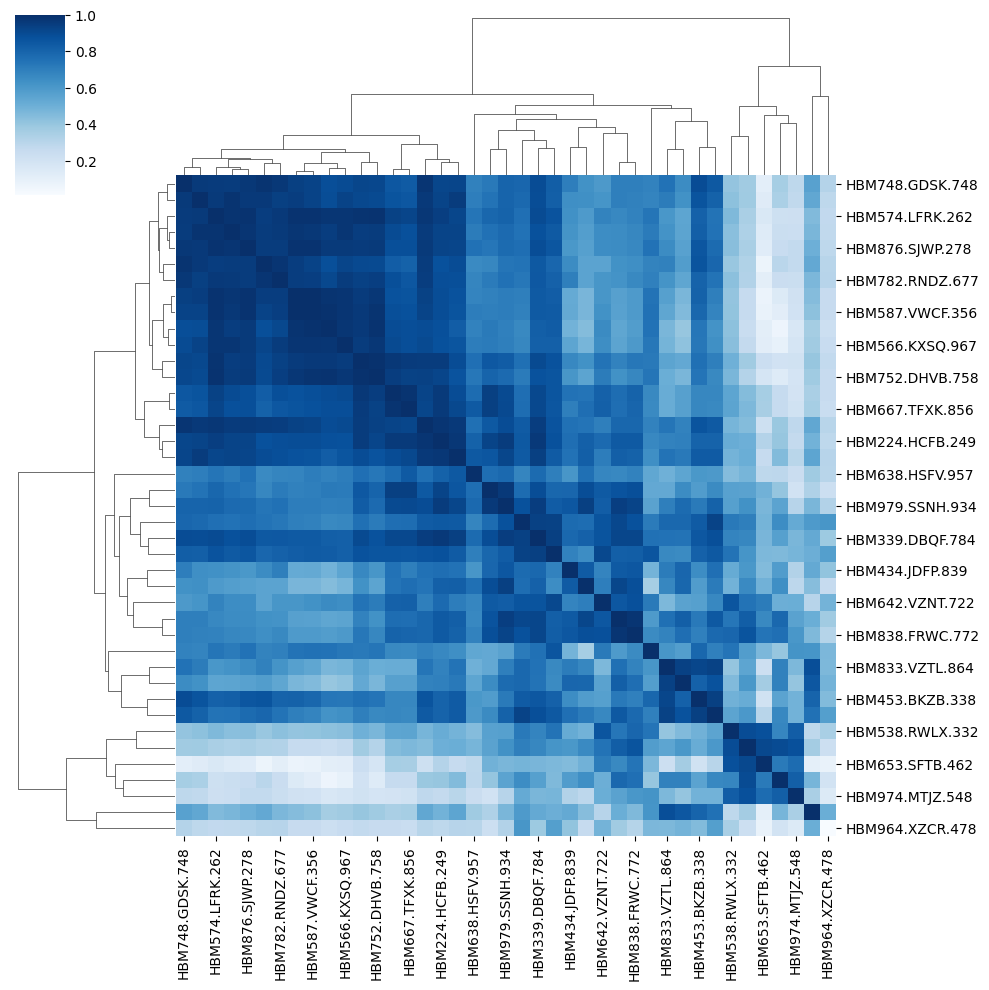

In [ ]:
import seaborn as sns

sns.clustermap(cos_sim_df, cmap="Blues").savefig("out.png")
